# ESTAD√çSTICAS HOSPITALIZACI√ìN HMN

Esta p√°gina provee una serie de pasos para procesar informaci√≥n a partir de archivos `.csv` espec√≠ficos del **Hospital Materno Neonatal**.

Se provee, adem√°s, una serie de funciones que agilizan el procesamiento y generaci√≥n de tablas y gr√°ficos a partir de la informaci√≥n procesada.

In [1]:
# Import csv file
!wget https://raw.githubusercontent.com/markitos314/statistical_analysis_for_patients_records/main/hospitalization_masked.csv

--2021-12-16 17:37:50--  https://raw.githubusercontent.com/markitos314/statistical_analysis_for_patients_records/main/hospitalization_masked.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2293767 (2.2M) [text/plain]
Saving to: ‚Äòhospitalization_masked.csv‚Äô

hospitalization_mas 100%[===================>]   2.19M  --.-KB/s    in 0.07s   

2021-12-16 17:37:50 (33.3 MB/s) - ‚Äòhospitalization_masked.csv‚Äô saved [2293767/2293767]



## Importar las funciones para el procesamiento de datos

Las funciones espec√≠ficas para el tratamiento de los archivos `.csv` se encuentran en un repositorio, de manera tal que pueden ser descargadas en bloque y luego importar la que sea necesaria.

Cada funci√≥n tiene su *docstring* explicando qu√© es necesario ingresarle y qu√© devuelve, junto con el procesamiento que realiza en cada caso.

Para tener las funciones en nuestro directorio de trabajo, las descargamos con el siguiente comando: ‚¨áÔ∏è

In [2]:
!wget https://raw.githubusercontent.com/markitos314/HMN/main/hmn_functions.py

--2021-12-16 17:37:51--  https://raw.githubusercontent.com/markitos314/HMN/main/hmn_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50413 (49K) [text/plain]
Saving to: ‚Äòhmn_functions.py‚Äô

hmn_functions.py    100%[===================>]  49.23K  --.-KB/s    in 0.01s   

2021-12-16 17:37:51 (4.47 MB/s) - ‚Äòhmn_functions.py‚Äô saved [50413/50413]



## Uso de las funciones

Las funciones que hay disponibles son:

### preprocess_hospitalizacion
Sirve particularmente para los `.csv` de la parte de hospitalizaci√≥n, ya que los de ambulatorio y emergenia tienen otra estructura. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import preprocess_hospitalizacion`, y luego
  * `dataframe` = preprocess_hospitalizacion('directorio/donde/se/encuentra/el/.csv')

> *Nota:* sustituir la palabra '*dataframe*' por el nombre que se le quiera dar a la variable (por ejemplo, hospitalizacion_enero [si fuera de las atenciones por hospitalizaci√≥n en enero], u hospitalizacion_2021 [si fueran todas las atenciones ingresadas por hospitalizaci√≥n en el a√±o 2021].


In [3]:
csv_file = "hospitalization_masked.csv"

In [14]:
# Ejemplo:
from hmn_functions import preprocess_hospitalizacion
hosp = preprocess_hospitalizacion(csv_file)
hosp.head(10)

DNI      NHC  ... DIF_ALTA_MEDICA_INGRESO   ESTADIA_TOTAL
0  16691dc1  8c66faf  ...         2 days 05:17:00 2 days 05:38:00
1  cb55819b  e9bf67c  ...         7 days 08:51:00 7 days 10:14:00
2  b58dd238  4bf258c  ...         4 days 05:36:00 4 days 09:26:00
3  83fddd1e  e51b29b  ...         4 days 02:00:00 4 days 03:18:00
4  83fddd1e  e51b29b  ...         4 days 02:00:00 4 days 03:18:00
5  2d2e40ee  8fffd30  ...         5 days 00:22:00 5 days 04:12:00
6  2d2e40ee  8fffd30  ...         5 days 00:22:00 5 days 04:12:00
7  d520fe3d  81f3f04  ...         4 days 18:24:00 4 days 22:32:00
8  0feed123  78faa95  ...         4 days 17:54:00 4 days 22:38:00
9  cb3021e3  40c8787  ...         2 days 05:30:00 2 days 06:21:00

[10 rows x 18 columns]

### concatenate_dfs
Se usa si se procesaron varios `.csv` y se quieren unir para que queden en uno solo. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import concatenate_dfs`, y luego
  * concatenate_dfs([dataframe1, dataframe2, dataframe3])

### top_20_professionals
Imprime una tabla y un gr√°fico de barras de los primeros 20 profesionales con m√°s atenciones de todas las secciones en el per√≠odo del dataframe ingresado. Y luego una tabla y un gr√°fico de barra de los 20 profesionales con m√°s atenciones de cada secci√≥n en el per√≠odo del dataframe ingresado. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import top_20_professionals`, y luego
  * top_20_professionals(dataframe)

Por defecto imprime el gr√°fico de barras **total**. Para elegir criterios cuando se llama la funci√≥n agregar las siguientes variables:
* `por_seccion = True` --> para incluir gr√°ficos divididos por secci√≥n. De lo contrario, `por_seccion = False`


Top 20 profesionales con mayoeres atenciones en todos los servicios


PROFESIONAL  ATENCIONES    % TOTAL
0   c4ad00448e084e116e5db3c61772d531        1029  10.287942
1   ba16871a4280ed0a538ff4137b9f2086         813   8.128374
2   b3784541c5204aa66c8a50ea8fc22a39         565   5.648870
3   71c3b672772080e9fb5d39e31e54e077         518   5.178964
4   993b64f57d5a1cca139b07869fa86843         495   4.949010
5   7d73d6fcb8f1dc3e51b1218c8de6d812         493   4.929014
6   e9538676468471806426a608645ea980         424   4.239152
7   b54a72955fe5b4c17b039856d23b3182         353   3.529294
8   b038c7c077b90918eaff567a3d5de5ec         285   2.849430
9   6af4f819819498b10cc5ad8e1d25ec4c         242   2.419516
10  77c79cfaad94830a19ceb40bfab3d4b9         240   2.399520
11  ea34e0dc87edddc738857f390ef5d722         228   2.279544
12  2af7c01b21447ee650dcfc4b45907e28         162   1.619676
13  9b004bdcd3276b105548878e036dc30d         162   1.619676
14  42786471a6a3e95861693f2671d07503         144   1.439712
15  44821d0d9cf591a6481a23d490b56618         144   1.439712
16  1aa7275508cf581249495a787673da26         142   1.419716
17  80b0939f2fb20e6dd30a7f2aad0be0d8         117   1.169766
18  48b39419017e6b042fb38f09da35ea1c         116   1.159768
19  cc4451cb4c97719755be9ef4fe5dd310         100   0.999800

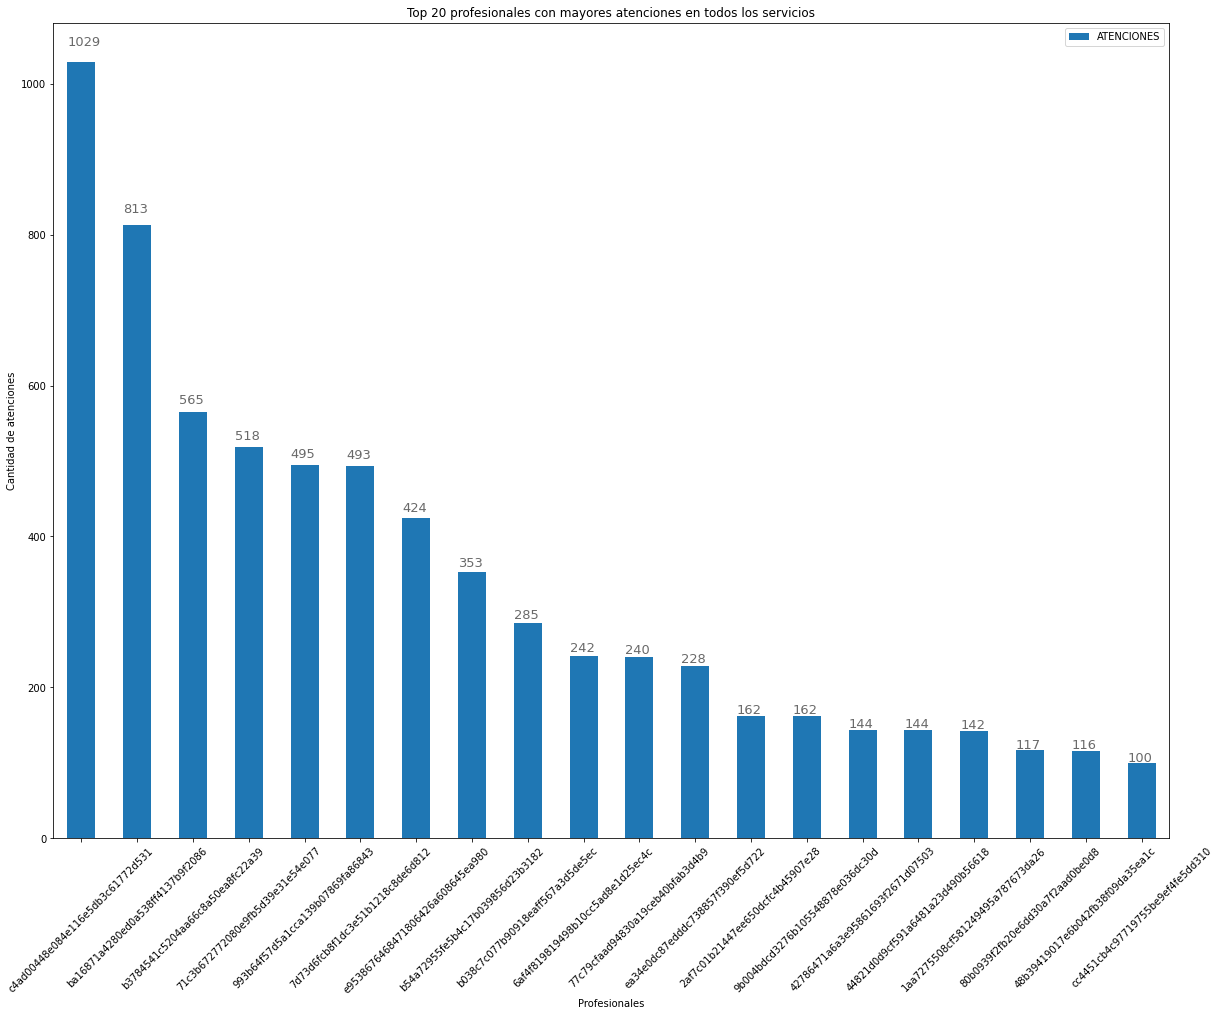

In [5]:
# Ejemplo:
from hmn_functions import top_20_professionals
top_20_professionals(hosp, por_seccion=False)

### atenciones
Imprime una tabla y/o un gr√°fico de torta de las atenciones del dataframe en el per√≠odo del dataframe ingresado. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_hosp`, y luego
  * atenciones_hosp(dataframe)


Atenciones en Tocoginecolog√≠a | HOSPITALIZACI√ìN (Total = 7617)


ATENCIONES  % TOTAL
Tocoginecolog√≠a        7568    99.36
UTIA                     49     0.64



Atenciones en Neonatolog√≠a | HOSPITALIZACI√ìN (Total = 2385)


ATENCIONES  % TOTAL
UCIN                 876    36.73
UTIN                 872    36.56
UMN                  602    25.24
Neonatologia          35     1.47

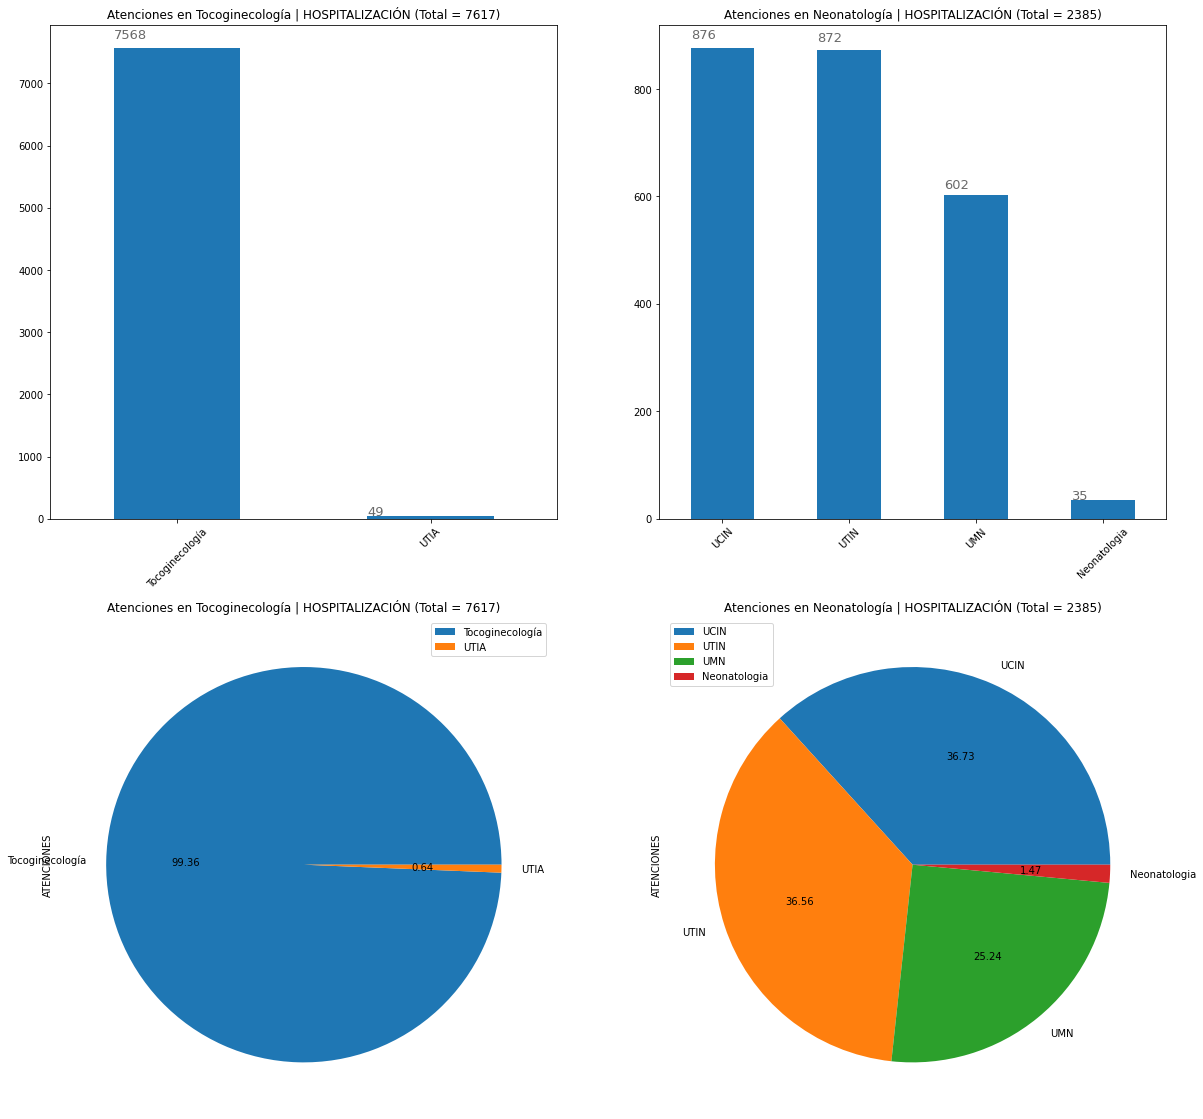

In [6]:
# Ejemplo:
from hmn_functions import atenciones_hosp
atenciones_hosp(hosp)

### atenciones_por_hora
Imprime un gr√°fico de barras de las atenciones en cada hora, en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de las atenciones en cada hora de cada secci√≥n en el per√≠odo del dataframe ingresado. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_por_hora_hosp`, y luego
  * atenciones_por_hora(dataframe)

Por defecto imprime el gr√°fico de barras **total**. Para elegir criterios cuando se llama la funci√≥n agregar las siguientes variables:
* `por_seccion = True` --> para incluir gr√°ficos divididos por secci√≥n. De lo contrario, `por_seccion = False`

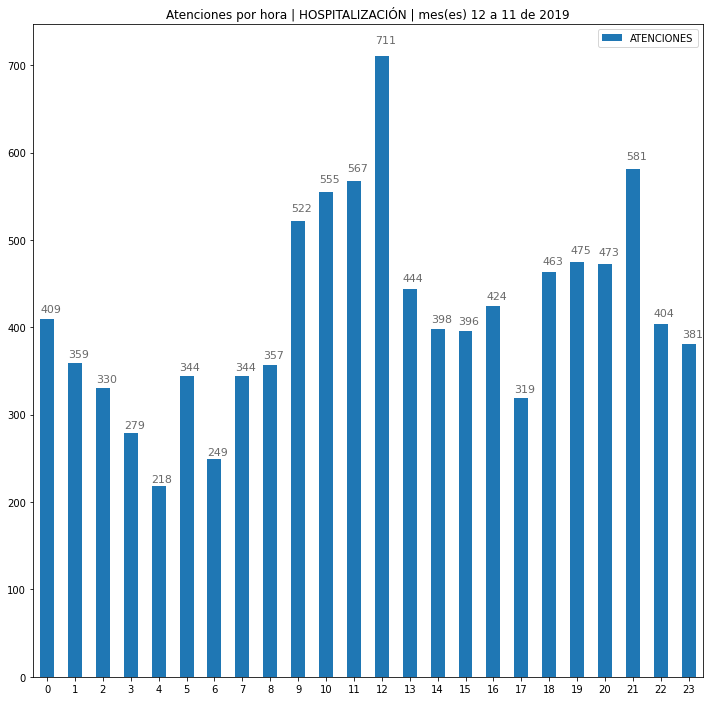

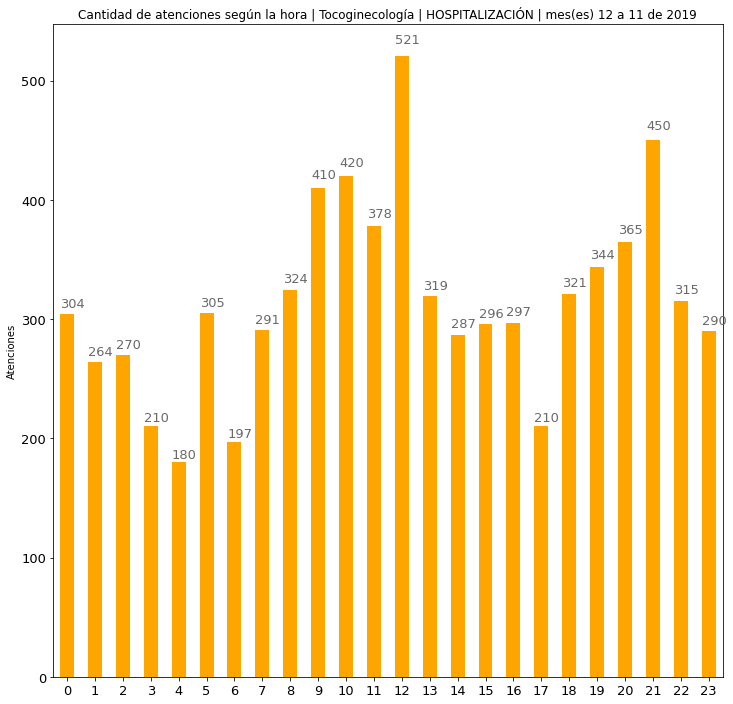

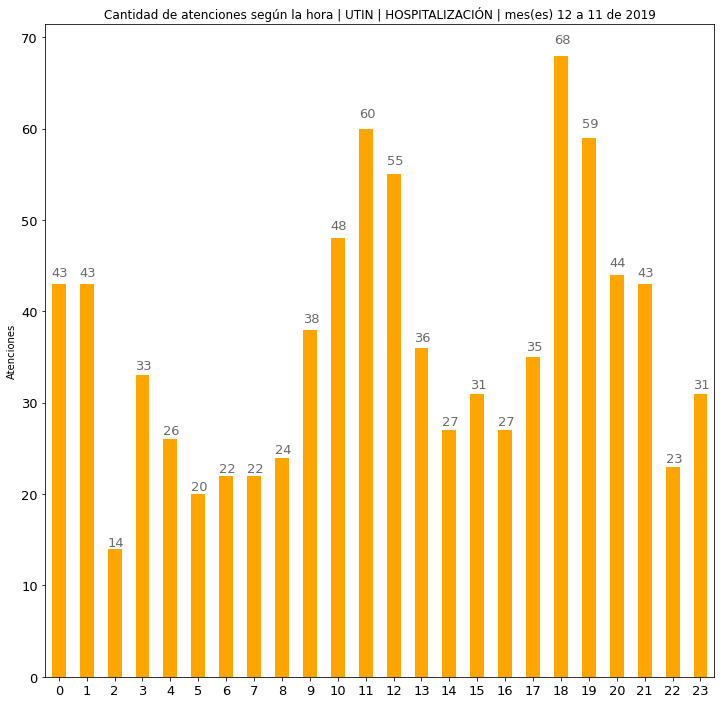

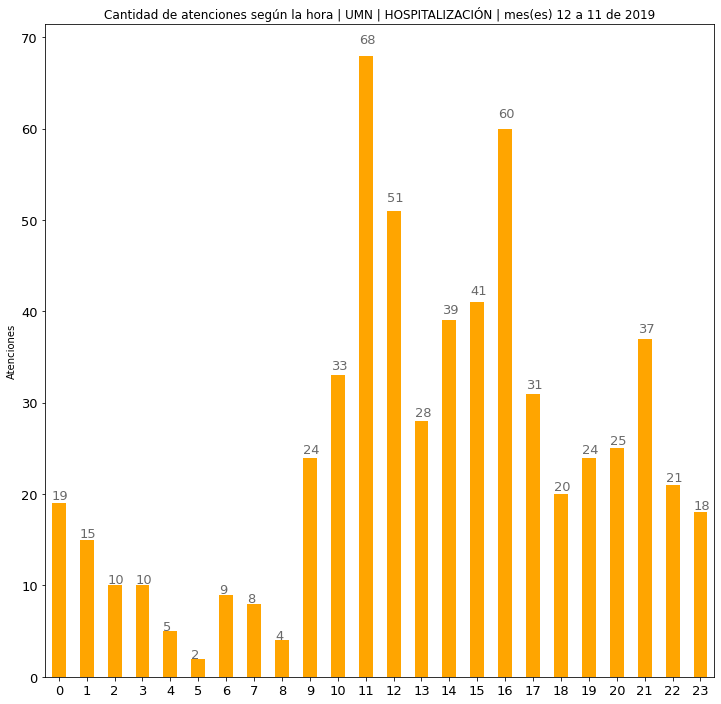

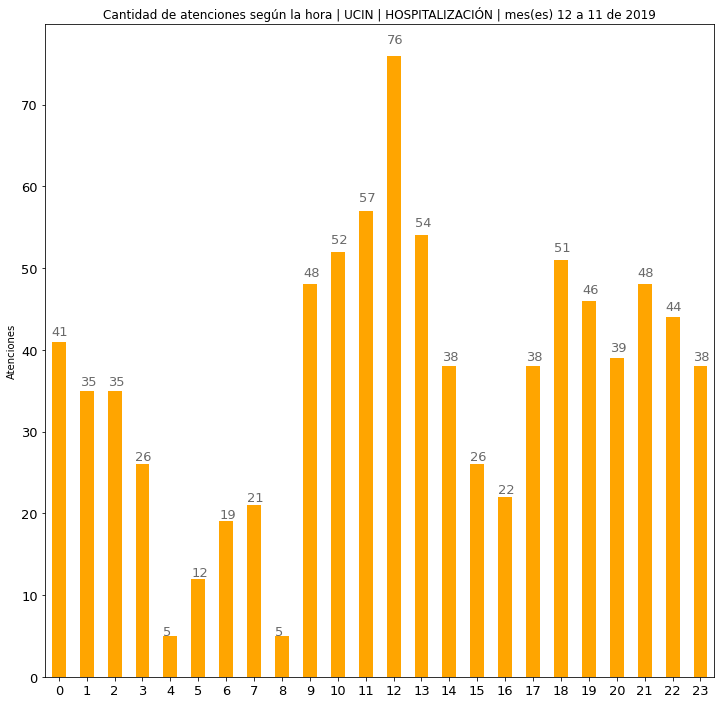

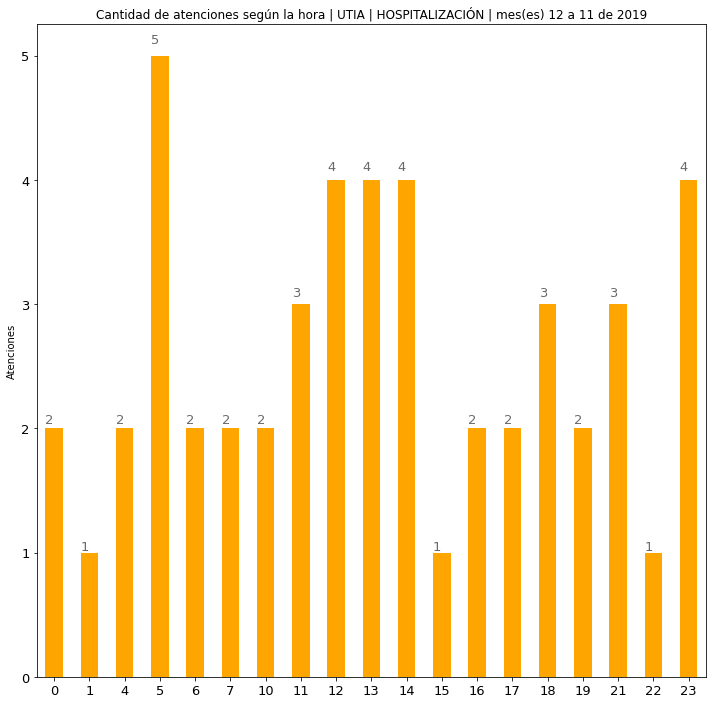

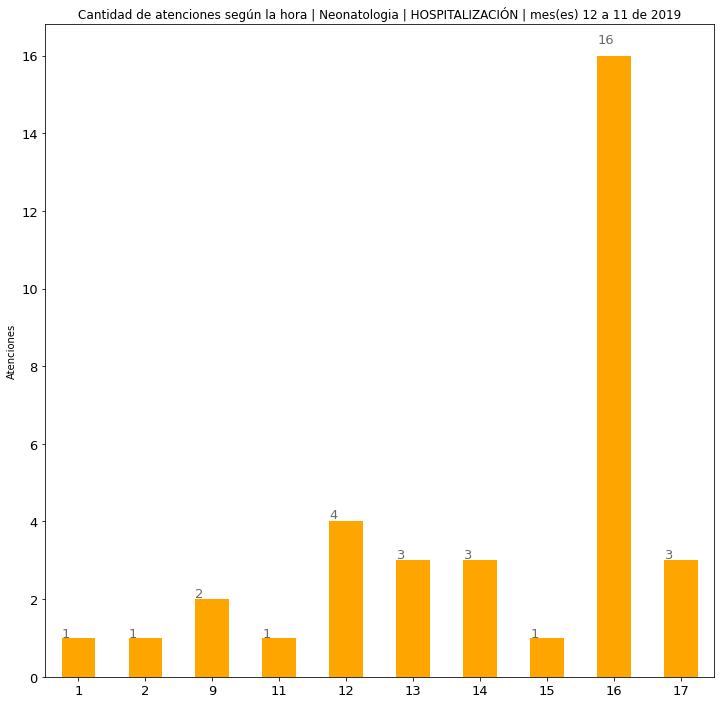

In [7]:
# Ejemplo:
from hmn_functions import atenciones_por_hora_hosp
atenciones_por_hora_hosp(hosp, por_servicio=True)

### atenciones_por_dia_semana
Imprime un gr√°fico de barras de las atenciones por d√≠a de la semana, en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de las atenciones por d√≠a de la semana de cada secci√≥n en el per√≠odo del dataframe ingresado. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_por_dia_semana`, y luego
  * atenciones_por_dia_semana(dataframe)

Por defecto imprime el gr√°fico de barras **total**. Para elegir criterios cuando se llama la funci√≥n agregar las siguientes variables:
* `por_seccion = True` --> para incluir gr√°ficos divididos por secci√≥n. De lo contrario, `por_seccion = False`

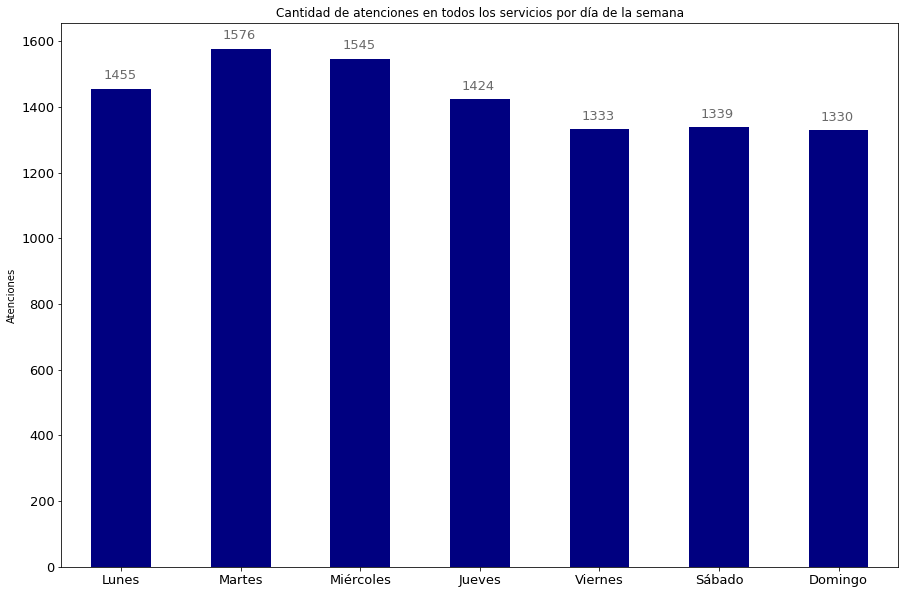

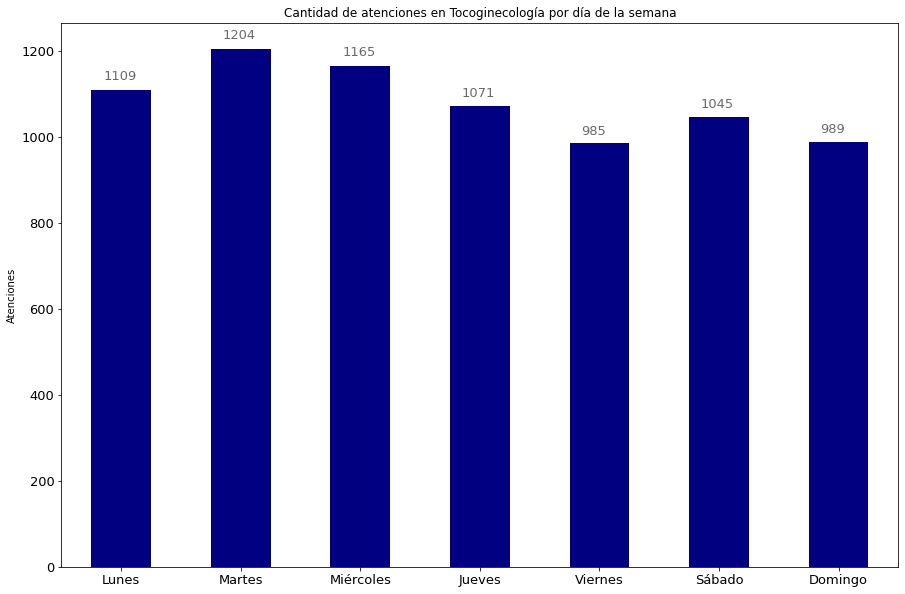

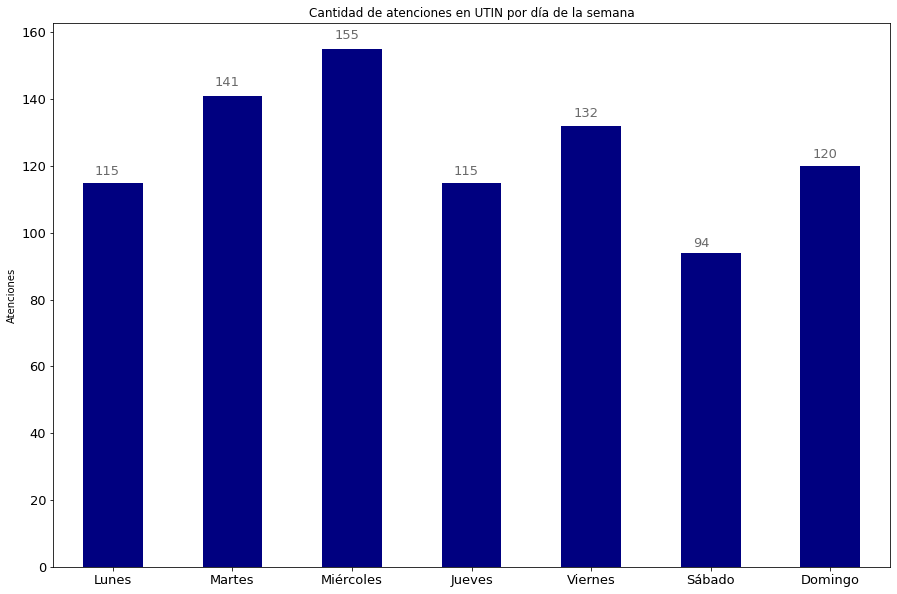

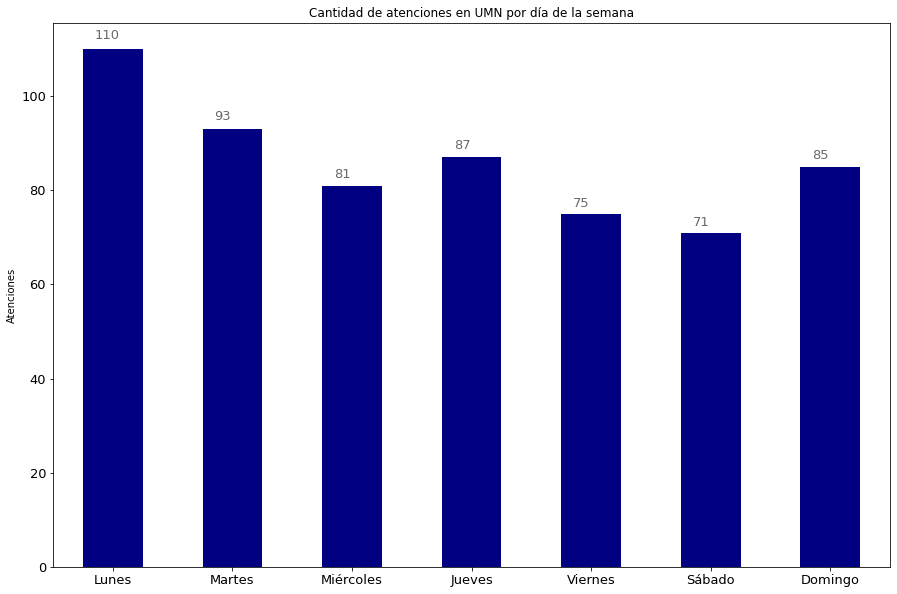

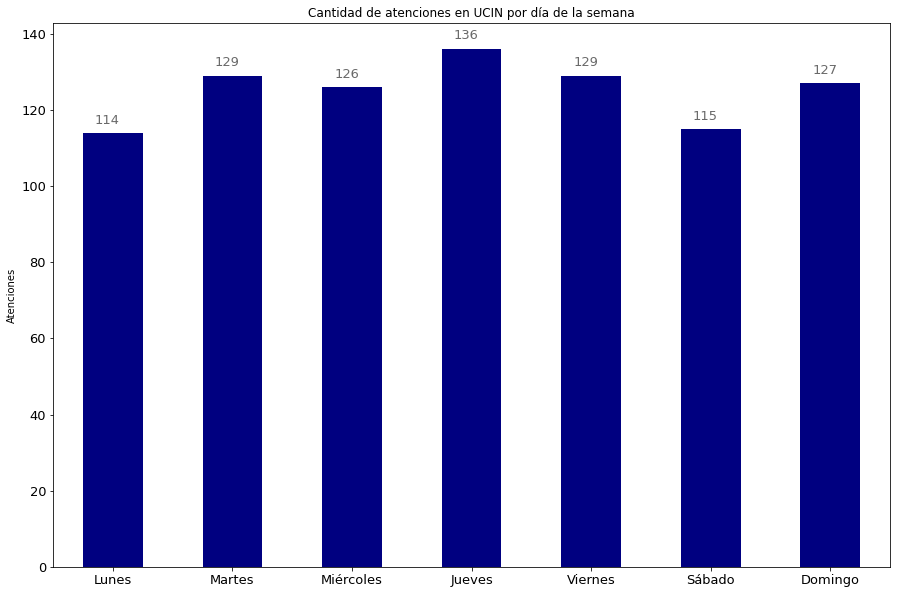

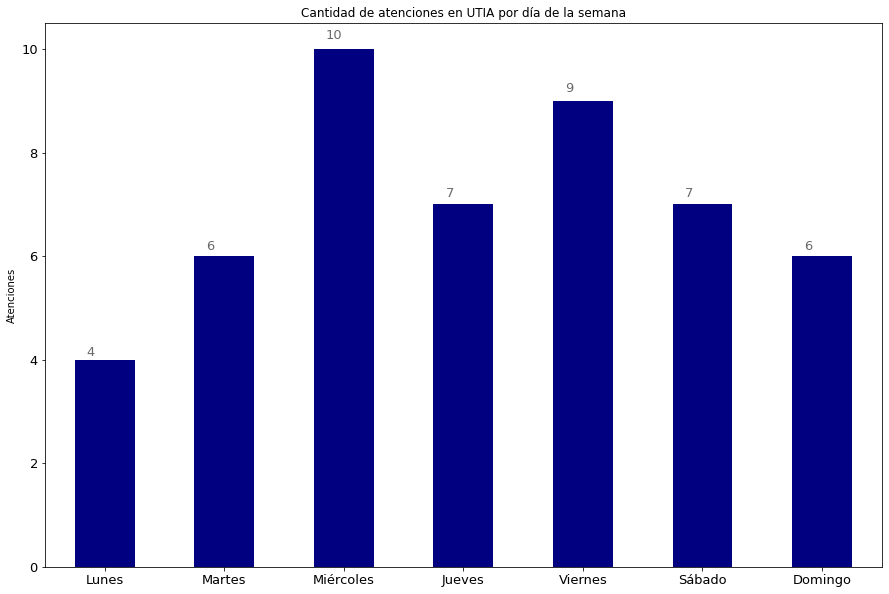

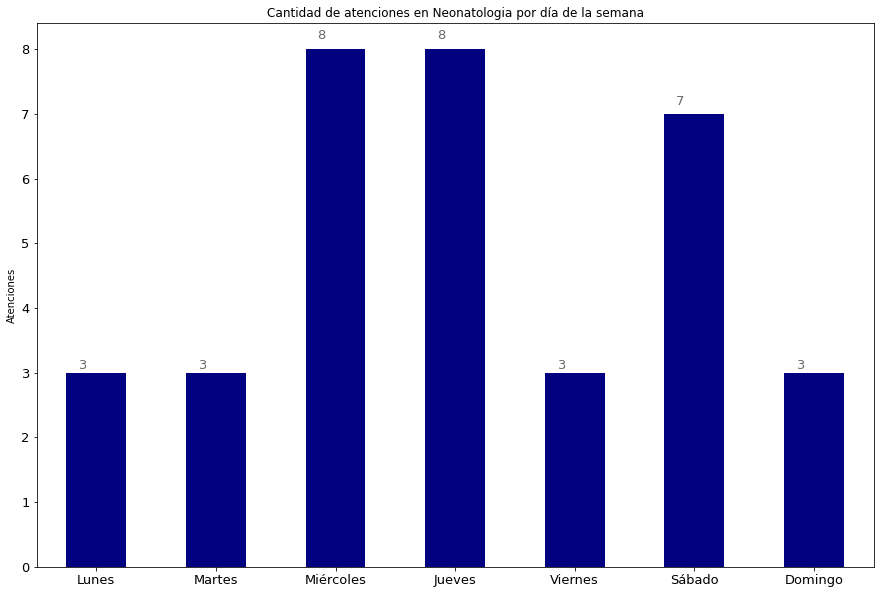

In [8]:
# Ejemplo:
from hmn_functions import atenciones_por_dia_semana
atenciones_por_dia_semana(hosp, por_seccion=True)

### atenciones_grupo_etareo
Imprime un gr√°fico de tortas de las atenciones por grupo et√°reo, en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de las atenciones por d√≠a de la semana de cada secci√≥n en el per√≠odo del dataframe ingresado. 

Por conveniencia, las franjas et√°reas se dividieron de la siguiente manera:

* 0 a√±os,
* 1 a 13 a√±os,
* 14 a 21 a√±os,
* 22 a 40 a√±os,
* 41 a 60 a√±os,
* 61 √≥ m√°s a√±os.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import atenciones_grupo_etareo`, y luego
  * atenciones_grupo_etareo(dataframe)

Por defecto imprime el gr√°fico de barras **total**. Para elegir criterios cuando se llama la funci√≥n agregar las siguientes variables:
* `por_seccion = True` --> para incluir gr√°ficos divididos por secci√≥n. De lo contrario, `por_seccion = False`

<Figure size 432x288 with 0 Axes>

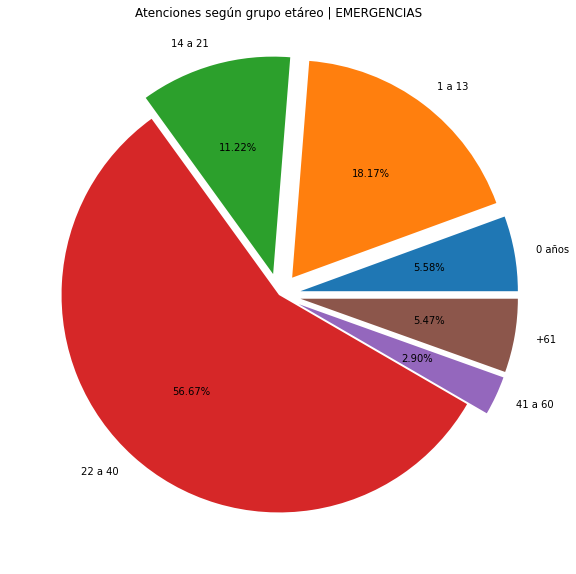

<Figure size 432x288 with 0 Axes>

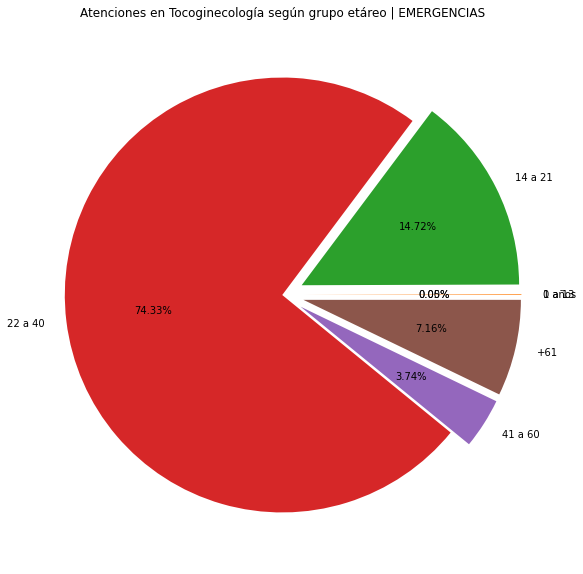

<Figure size 432x288 with 0 Axes>

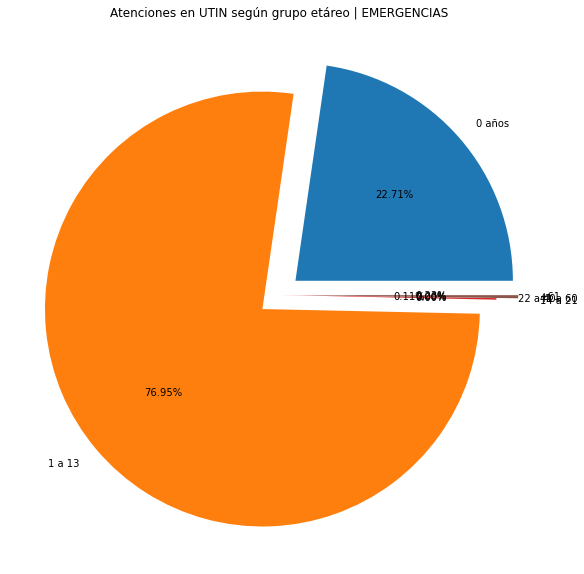

<Figure size 432x288 with 0 Axes>

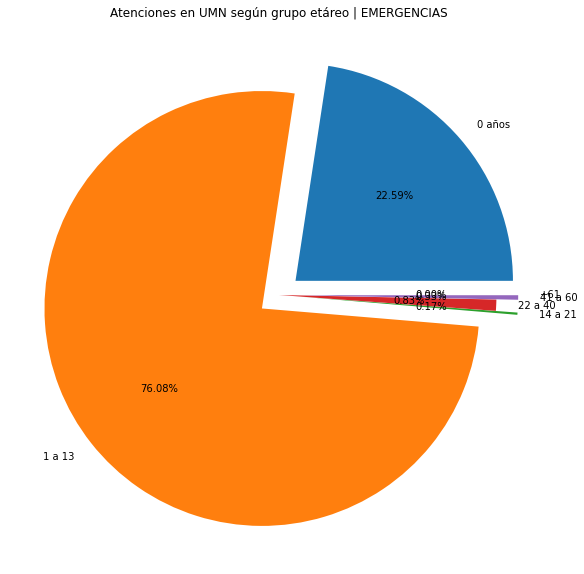

<Figure size 432x288 with 0 Axes>

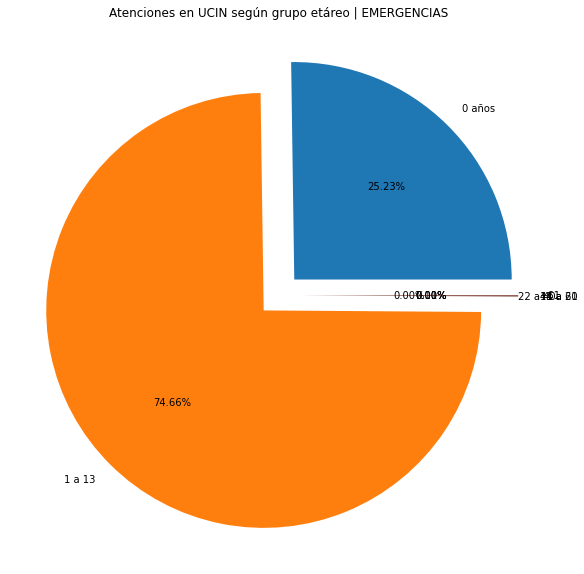

<Figure size 432x288 with 0 Axes>

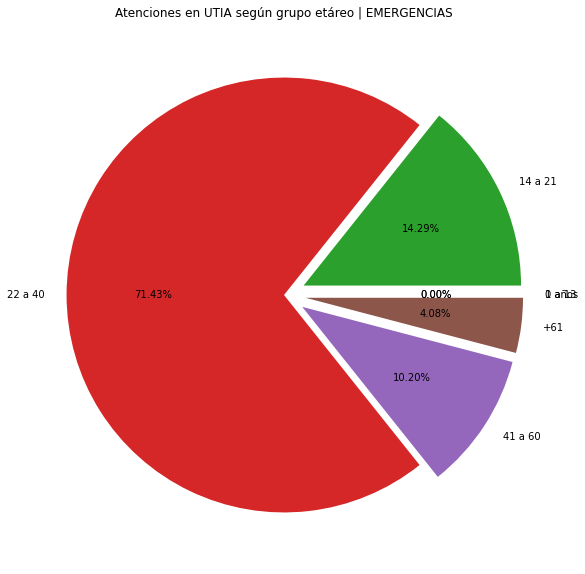

<Figure size 432x288 with 0 Axes>

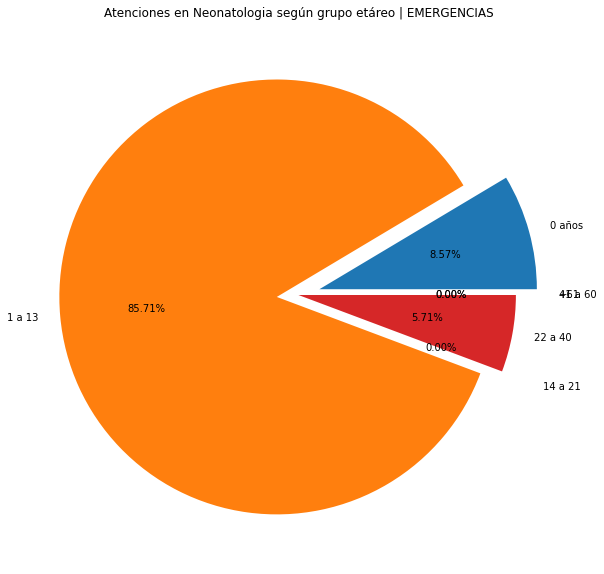

In [9]:
# Ejemplo:
from hmn_functions import atenciones_grupo_etareo
atenciones_grupo_etareo(hosp) # me falta corregir el t√≠tulo, dice EMERGENCIAS

### motivo_alta
Imprime una tabla y un gr√°fico de barras horizontal de los distintos motivos de alta, en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de las atenciones por d√≠a de la semana de cada secci√≥n en el per√≠odo del dataframe ingresado.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import motivo_alta`, y luego
  * motivo_alta(dataframe)

MOTIVO_ALTA  CANTIDAD
0                     Mejor√≠a cl√≠nica      7510
1                  Tratamiento m√©dico       908
2                         Otro motivo       889
3              Tratamiento quir√∫rgico       333
4  Retiro en contra de opini√≥n m√©dica       291
5                          Defunci√≥n         71

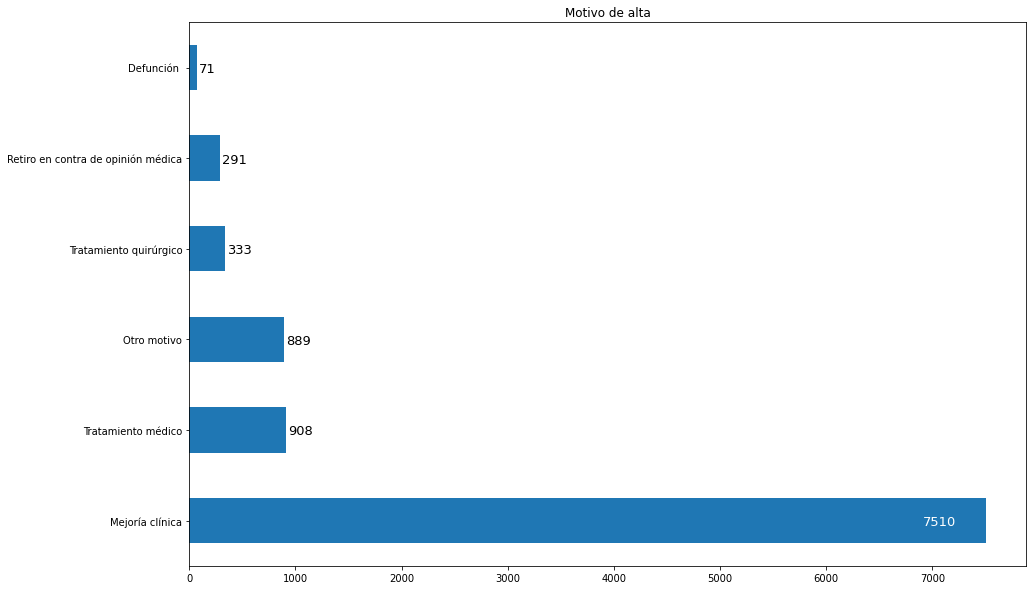

In [10]:
# Ejemplo:
from hmn_functions import motivo_alta
motivo_alta(hosp)

### top_20_cod_diagnostics
Imprime un gr√°fico de barras de los 20 diagn√≥sticos m√°s repetidos (codificados), en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de los 20 diagn√≥sticos m√°s repetidos (codificados) por secci√≥n en el per√≠odo del dataframe ingresado.

> üîë **Nota:** Si la secci√≥n tiene s√≥lo diagn√≥sticos sin codificar (figurar√°n con la leyenda 'nan', se graficar√°n s√≥lo esos. De lo contrario los dem√°s gr√°ficos NO muestran los diagn√≥sticos no codificados. 

Los totales figuran en el t√≠tulo del gr√°fico.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import top_20_cod_diagnostics`, y luego
  * top_20_cod_diagnostics(dataframe)

Por defecto imprime el gr√°fico de barras **total**. Para elegir criterios cuando se llama la funci√≥n agregar las siguientes variables:
* `por_seccion = True` --> para incluir gr√°ficos divididos por secci√≥n. De lo contrario, `por_seccion = False`


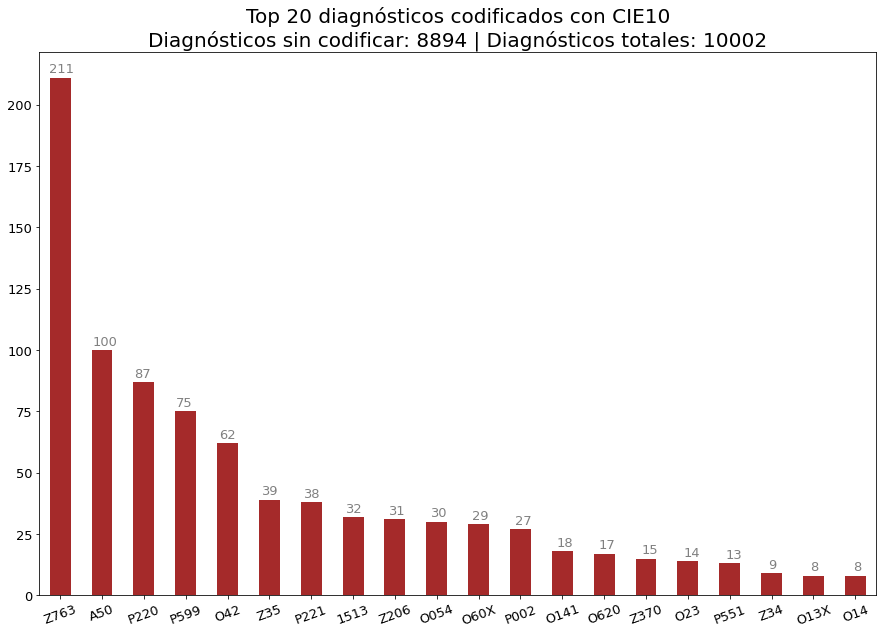

In [11]:
# Ejemplo:
from hmn_functions import top_20_cod_diagnostics
top_20_cod_diagnostics(hosp, por_seccion=False)

### promedios_tiempo

Muestra los promedios de tiempo entre:

* Ingreso y Alta M√©dica
* Alta M√©dica y Alta Administrativa
* Ingreso y Alta Administrativa (estad√≠a total)

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import promedios_tiempo`, y luego
  * promedios_tiempo(dataframe)


In [12]:
# Ejemplo:
from hmn_functions import promedios_tiempo
promedios_tiempo(hosp)

Medias de tiempo seg√∫n estado del paciente:
Entre Ingreso y Alta M√©dica: 6 days 06:13:22.549490102
Entre Alta M√©dica y Alta Administrativa: 0 days 06:30:43.563287342
Entre Ingreso y Alta Administrativa: 6 days 12:44:06.112777444

Medias de tiempo seg√∫n estado del paciente en Tocoginecolog√≠a:
Entre Ingreso y Alta M√©dica en Tocoginecolog√≠a: 3 days 03:58:23.237315010
Entre Alta M√©dica y Alta Administrativa en Tocoginecolog√≠a: 0 days 04:14:36.905391120
Entre Ingreso y Alta Administrativa en Tocoginecolog√≠a: 3 days 08:13:00.142706131

Medias de tiempo seg√∫n estado del paciente en UTIN:
Entre Ingreso y Alta M√©dica en UTIN: 30 days 17:19:06.743119266
Entre Alta M√©dica y Alta Administrativa en UTIN: 0 days 19:27:15.894495412
Entre Ingreso y Alta Administrativa en UTIN: 31 days 12:46:22.637614679

Medias de tiempo seg√∫n estado del paciente en UMN:
Entre Ingreso y Alta M√©dica en UMN: 5 days 08:42:18.837209302
Entre Alta M√©dica y Alta Administrativa en UMN: 0 days 09:00:38.0730897